#**Heart Disease Prediction**


**Importing the libraries**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
dataSet = pd.read_csv('/content/drive/My Drive/data/heart.csv')

X = dataSet.iloc[:, :-1]
y = dataSet.iloc[:, -1]

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataSet.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
neg = y[y == 0].shape[0]
pos = y[y == 1].shape[0]

Negative:		 138
Positive:		 165


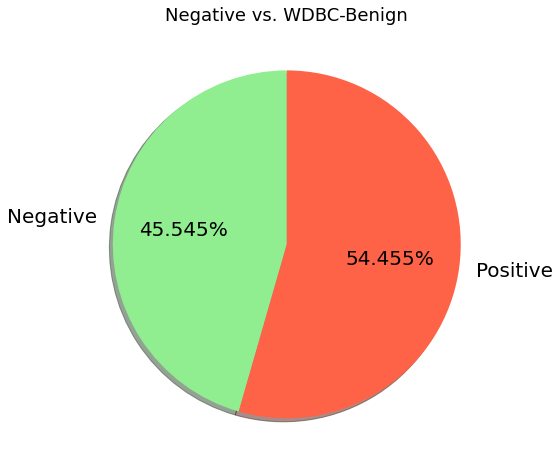

In [7]:
print('Negative:\t\t', neg)
print('Positive:\t\t', pos)

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Negative vs. WDBC-Benign', size=18)
plt.pie([neg, pos], labels=['Negative', 'Positive'], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using KNeighborsClassifier

Best Parameters (Grid Search): {'n_neighbors': 10}

The best number of neighbors: 10


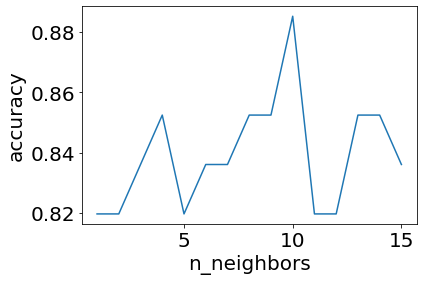




Accuracy:	0.8852459016393442
Precision:	0.9090909090909091
Recall:		0.8823529411764706




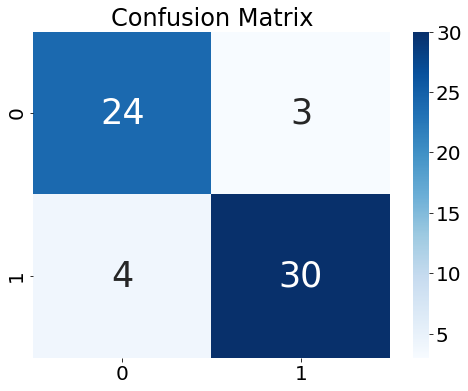

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Applying Grid Search to find the best parameters
param = {'n_neighbors': np.arange(1, 11)}        
search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

search = search.fit(X_train, y_train)
print("Best Parameters (Grid Search):", search.best_params_, end='\n\n')


# Visualizing the accuracies of different number of neighbors
accuracies = {}
neighbors = np.arange(1, 16)
for i in neighbors:
  temp_model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  accuracies[i] = accuracy_score(y_test, temp_model.predict(X_test))

print('The best number of neighbors:', pd.DataFrame(accuracies.values(), accuracies.keys())[0].idxmax())
plt.plot(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()


# Building the model
model = KNeighborsClassifier(n_neighbors = search.best_params_['n_neighbors'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\n\n')
report(y_test, y_pred)

##Training The Model Using RandomForestClassifier

The best number of estimators: 10


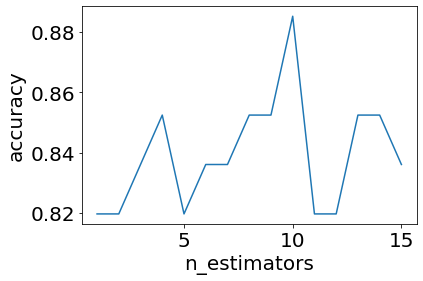

Accuracy:	0.8852459016393442
Precision:	0.9090909090909091
Recall:		0.8823529411764706




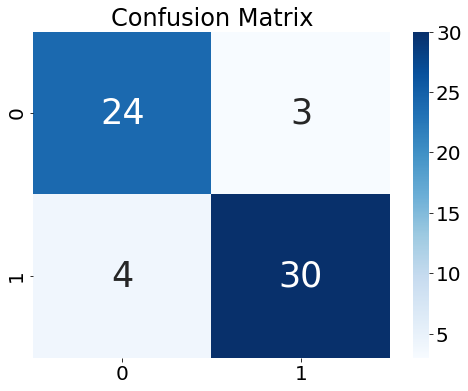

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Visualizing the accuracies of different number of estimators
accuracies = {}
neighbors = np.arange(1, 16)
for i in neighbors:
  temp_model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  accuracies[i] = accuracy_score(y_test, temp_model.predict(X_test))

estimators = pd.DataFrame(accuracies.values(), accuracies.keys())[0].idxmax()
print('The best number of estimators:', estimators)
plt.plot(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()


model = RandomForestClassifier(n_estimators=estimators, 
                               random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)


##Training The Model Using XGBClassifier

Accuracy:	0.8524590163934426
Precision:	0.8571428571428571
Recall:		0.8823529411764706




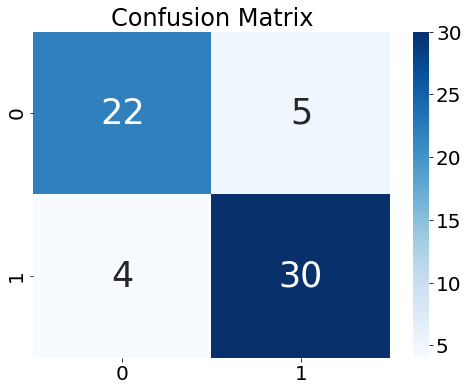

In [60]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using GradientBoostingClassifier

Accuracy:	0.8852459016393442
Precision:	0.9090909090909091
Recall:		0.8823529411764706




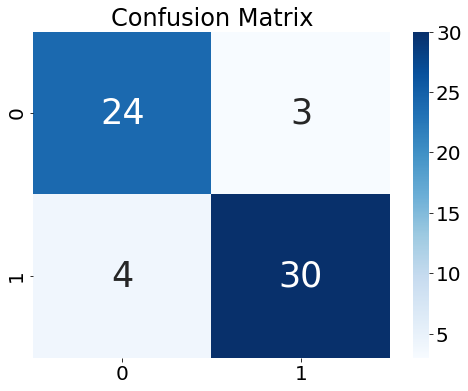

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=140,
                                   max_depth=2, 
                                   loss='exponential',
                                   random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)


#Training The Model Using SVC

Best Parameters (Grid Search): {'C': 2, 'kernel': 'rbf'}

Accuracy:	0.8852459016393442
Precision:	0.8857142857142857
Recall:		0.9117647058823529




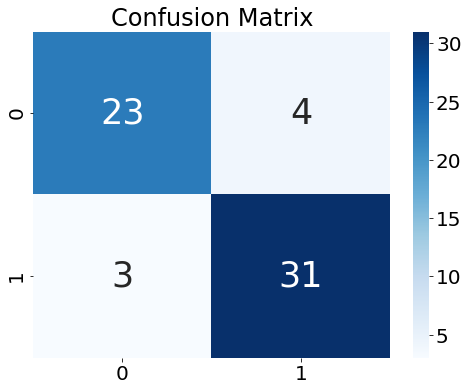

In [81]:
from sklearn.svm import SVC

# Applying Grid Search to find the best parameters
param = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
         'C': np.arange(1, 5)}    

search = GridSearchCV(estimator = SVC(random_state = 0),
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

search = search.fit(X_train, y_train)
print("Best Parameters (Grid Search):", search.best_params_, end='\n\n')


model = search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

#Training The Model Using AdaBoostClassifier

The best number of estimators: 24


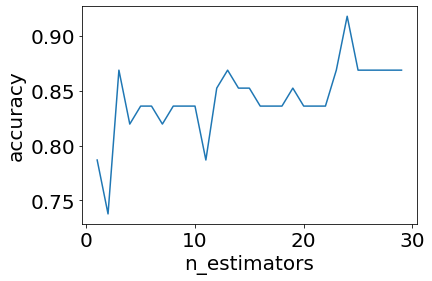

In [89]:
from sklearn.ensemble import AdaBoostClassifier

# Visualizing the accuracies of different number of estimators
accuracies = {}
neighbors = np.arange(1, 30)
for i in neighbors:
  temp_model = AdaBoostClassifier(n_estimators=i, random_state=0).fit(X_train, y_train)
  accuracies[i] = accuracy_score(y_test, temp_model.predict(X_test))

estimators = pd.DataFrame(accuracies.values(), accuracies.keys())[0].idxmax()
print('The best number of estimators:', estimators)
plt.plot(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

Accuracy:	0.9180327868852459
Precision:	0.967741935483871
Recall:		0.8823529411764706




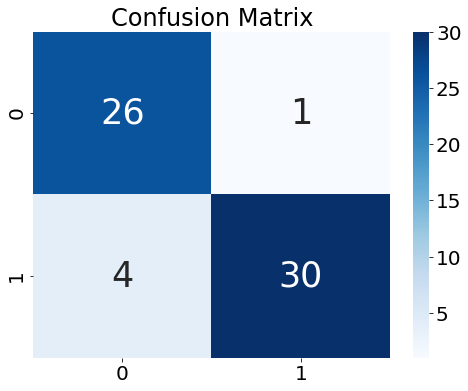

In [91]:
model = AdaBoostClassifier(n_estimators=estimators,
                           random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)